<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/Lab_10__Hidden_Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

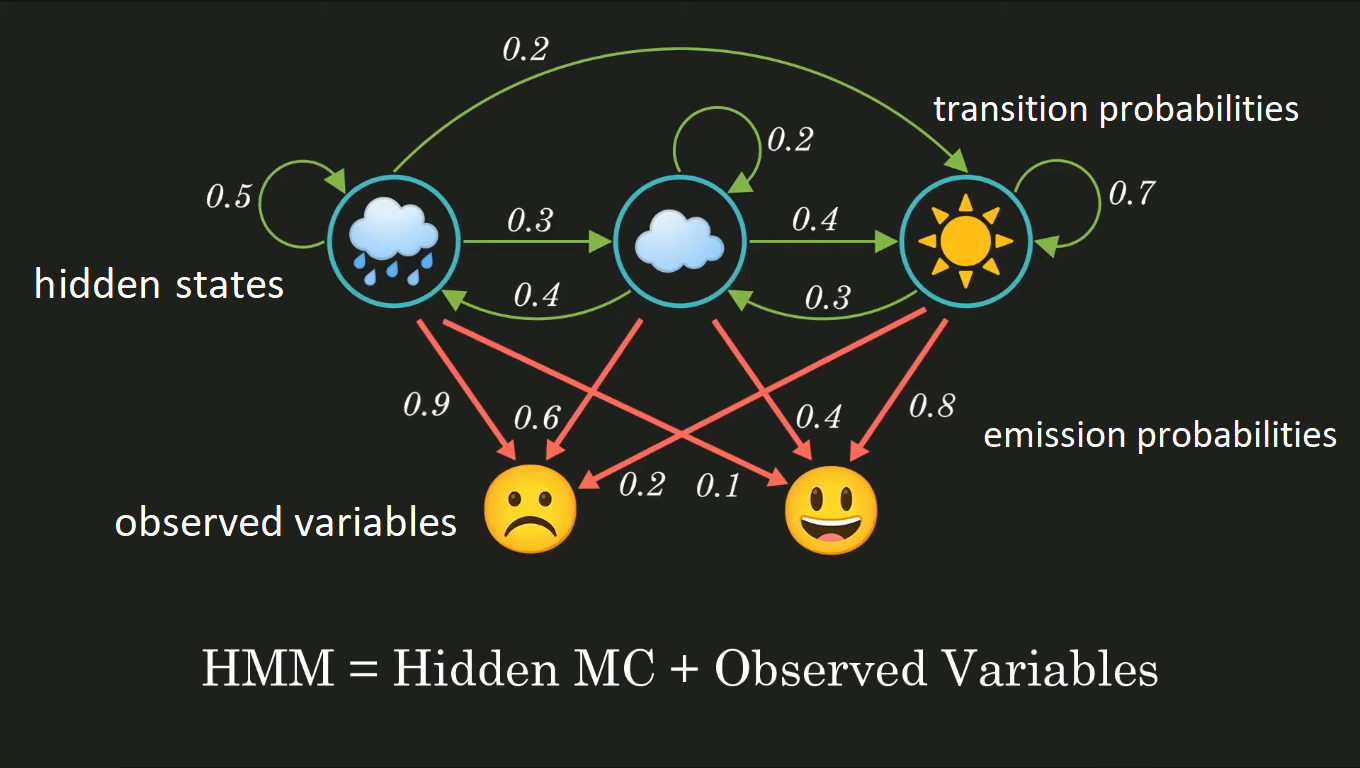

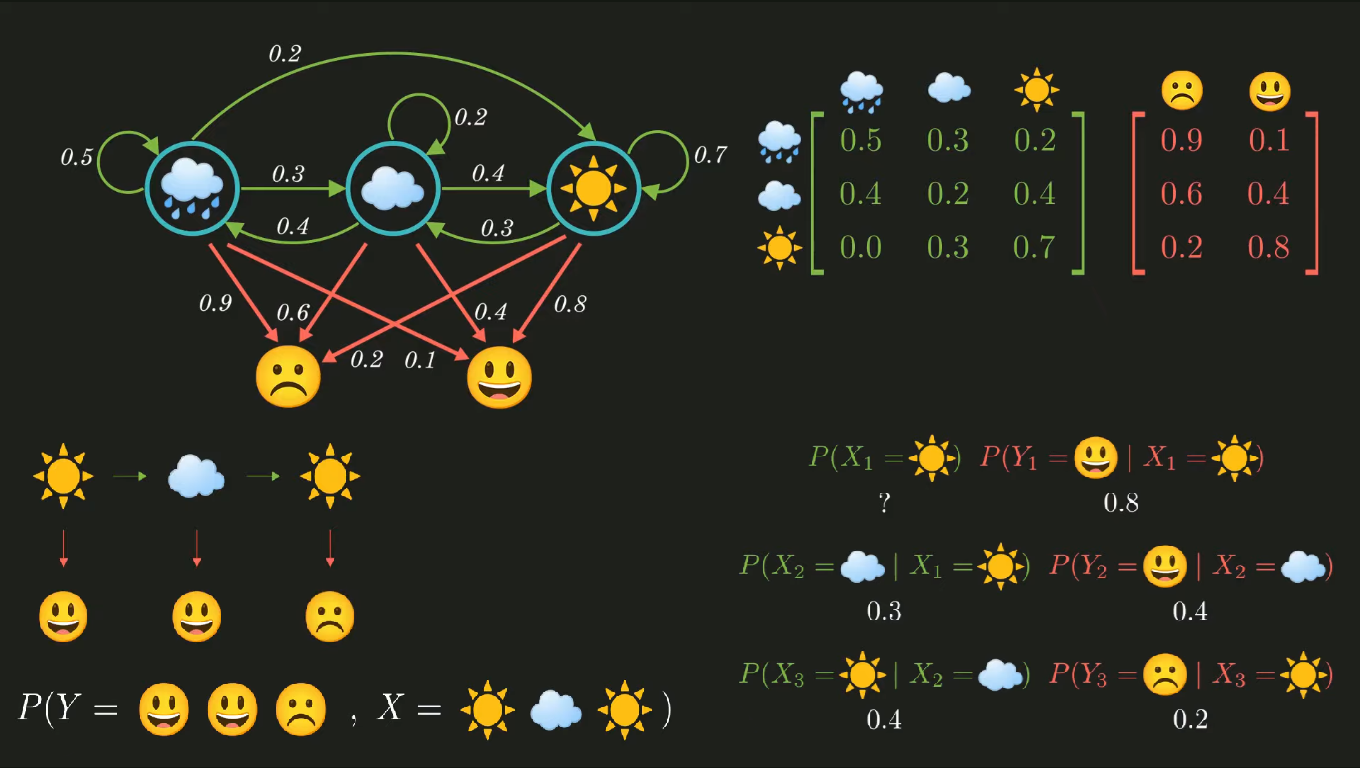

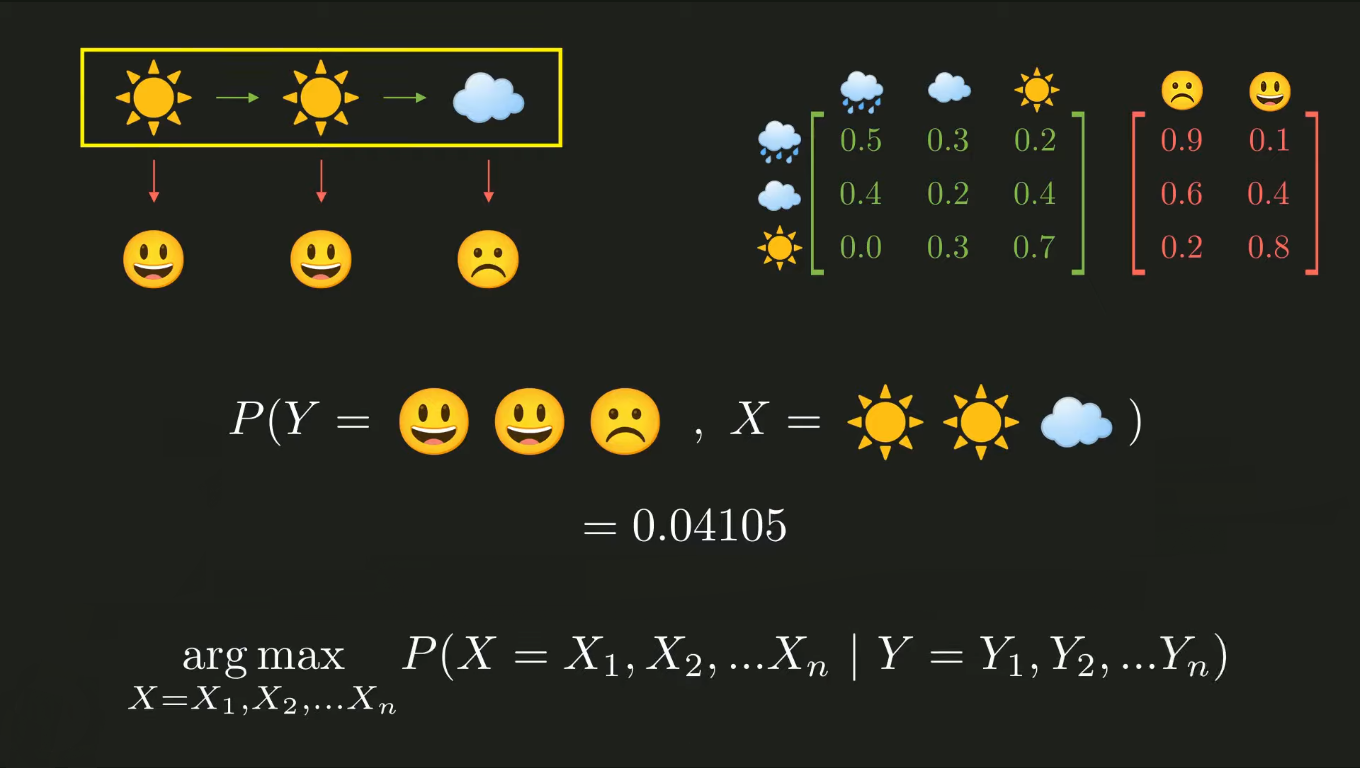

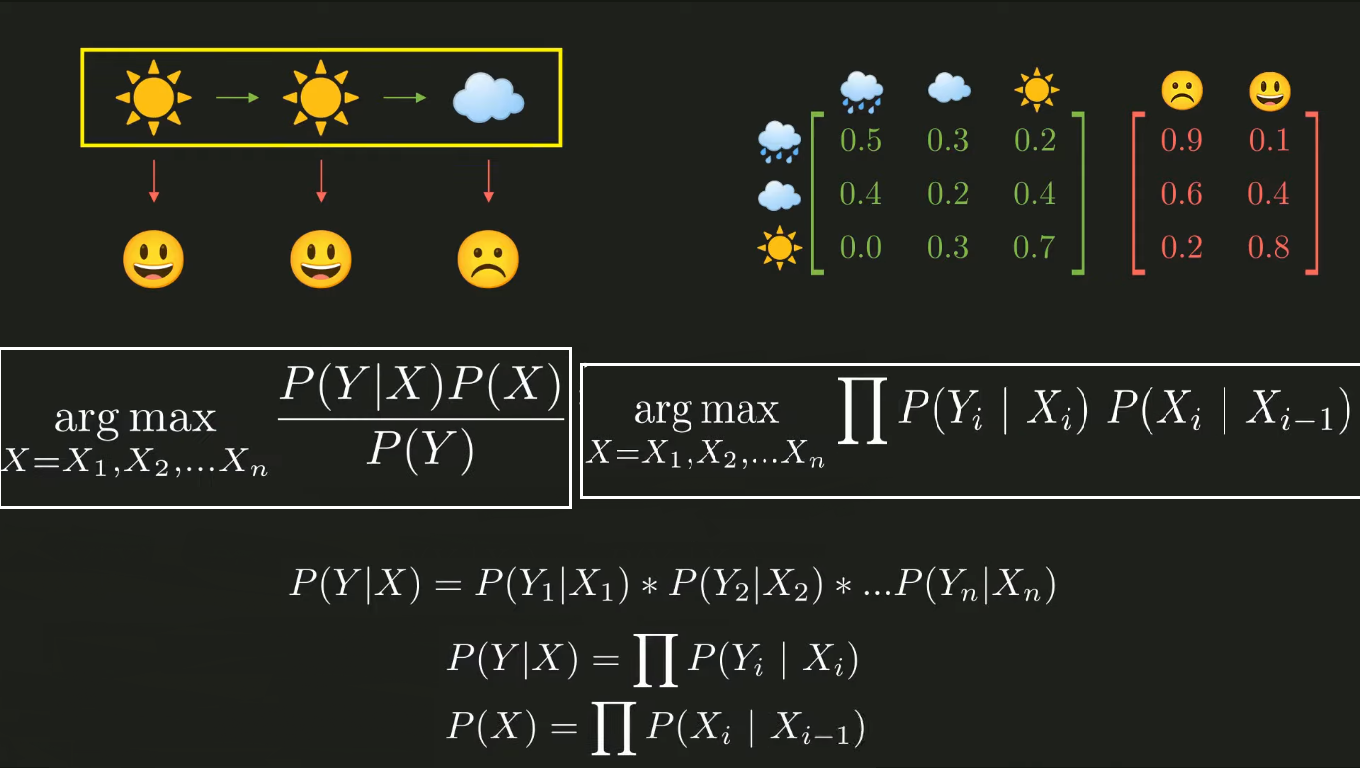

## Step-1: Installing HMM as it is not available in scikit learn  library





In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.9 MB/s eta 0:00:00


## Step-2: Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

## Step-3: Defining the model parameters

* The number of hidden states and the number of observations are defined as constants.

In [ ]:
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)

observations = ["Happy", "Sad"]
n_observations = len(observations)
print('Number of observations  :',n_observations)

Number of hidden states : 2
Number of observations  : 2


In [ ]:
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)

emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


## Step-4: Creating model and parameter setting

In [ ]:
model = hmm.CategoricalHMM(n_components = n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

## Step-5: Defining an observation sequence

In [ ]:
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

## Step-6: Predicting the most likely sequence of hidden states

In [ ]:
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 1 1 0 0]


##Step-7: Decoding the observation sequence

In [ ]:
log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


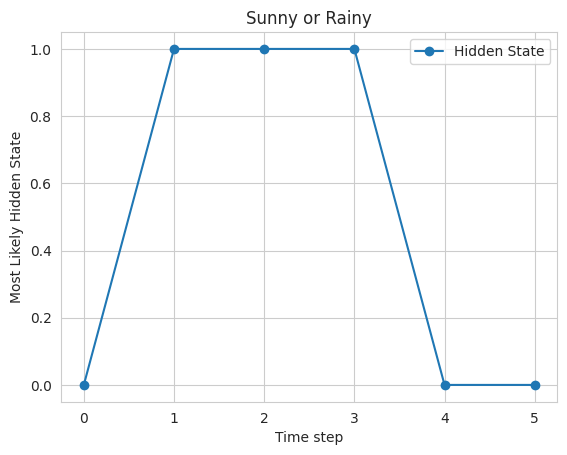

In [ ]:
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()